<a href="https://colab.research.google.com/github/swarnava-96/Time-Series/blob/main/Univariate_Time_Series_Analysis_and_Forecasting_using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Univariate Time Series Analysis and Forecasting using Stacked LSTM**

In [2]:
!pip install tensorflow==2.5

     |████████████████████████████████| 454.3 MB 15 kB/s 
     |████████████████████████████████| 4.0 MB 42.4 MB/s 
     |████████████████████████████████| 462 kB 55.9 MB/s 
     |████████████████████████████████| 1.2 MB 54.6 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.39.0
    Uninstalling grpcio-1.39.0:
      Successfully uninstalled grpcio-1.39.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


In [4]:
import tensorflow

In [5]:
tensorflow.__version__

'2.5.0'

In [6]:
# Let importthe libraries

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten

### Data Preprocessing

In [7]:
# Preparing the independent and Dependent features

def prepare_data(timeseries_data, n_features):
  X, y = [], []
  for i in range(len(timeseries_data)):
    # Finding the end of this pattern
    end_ix = i + n_features
    # Checking if we are beyond the sequence
    if end_ix > len(timeseries_data) - 1:
      break
    # Gather the input and output parts of the pattern
    seq_X, seq_y = timeseries_data[i : end_ix], timeseries_data[end_ix]
    X.append(seq_X)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [8]:
# Define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

# Choosing the number of time steps
n_steps = 3

# Split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [9]:
# Lets see the X data and the y data
print(X), print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [10]:
# Lets see the shape of X
X.shape

(6, 3)

In [11]:
# Reshape from [samples, timesteps] into [samples, timesteps, features]

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Model Building

In [12]:
# Building LSTM model

## Defining the model
model = Sequential()
model.add(LSTM(50, activation = "relu", return_sequences = True, input_shape = (n_steps, n_features)))
model.add(LSTM(50, activation = "relu"))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = "mse")

# Fitting the model
model.fit(X, y, epochs = 300, verbose = 1)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 32884.4570
Epoch 2/300
1/1 [==============================] - 0s 14ms/step - loss: 32323.8223
Epoch 3/300
1/1 [==============================] - 0s 10ms/step - loss: 31791.1738
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 31251.4121
Epoch 5/300
1/1 [==============================] - 0s 12ms/step - loss: 30662.9922
Epoch 6/300
1/1 [==============================] - 0s 18ms/step - loss: 30060.8301
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 29535.7520
Epoch 8/300
1/1 [==============================] - 0s 10ms/step - loss: 29187.4473
Epoch 9/300
1/1 [==============================] - 0s 10ms/step - loss: 28874.4473
Epoch 10/300
1/1 [==============================] - 0s 9ms/step - loss: 28559.0293
Epoch 11/300
1/1 [==============================] - 0s 19ms/step - loss: 28233.4160
Epoch 12/300
1/1 [==============================] - 0s 8ms/step - loss: 27898.4629
Epoch

### Predicting For the next 10 data

In [14]:
# Demostrating the data for the next 10 days

x_input = np.array([187, 196, 210])
temp_input = list(x_input)
list_output = []
i = 0

while(i < 10):
  if (len(temp_input) > 3):
    x_input =np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose = 0)
    print("{} day output {}".format(i, yhat))
    temp_input.append(yhat[0][0])
    temp_input = temp_input[1:]
    list_output.append(yhat[0][0])
    i = i + 1

  else:
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose = 0)
    print(yhat[0])
    temp_input.append(yhat[0][0])
    list_output.append(yhat[0][0])
    i = i + 1

print(list_output)


[222.29054]
1 day input [196.        210.        222.2905426]
1 day output [[233.1637]]
2 day input [210.         222.2905426  233.16369629]
2 day output [[247.67923]]
3 day input [222.29054 233.1637  247.67923]
3 day output [[260.89413]]
4 day input [233.1637  247.67923 260.89413]
4 day output [[274.45288]]
5 day input [247.67923 260.89413 274.45288]
5 day output [[290.1584]]
6 day input [260.89413 274.45288 290.1584 ]
6 day output [[305.30588]]
7 day input [274.45288 290.1584  305.30588]
7 day output [[321.36472]]
8 day input [290.1584  305.30588 321.36472]
8 day output [[338.8331]]
9 day input [305.30588 321.36472 338.8331 ]
9 day output [[356.38583]]
[222.29054, 233.1637, 247.67923, 260.89413, 274.45288, 290.1584, 305.30588, 321.36472, 338.8331, 356.38583]


### Visualizing the output

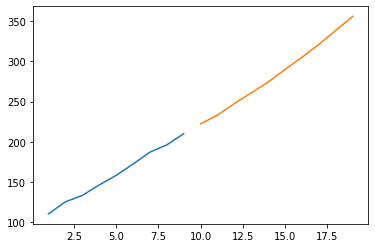

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

day_new = np.arange(1, 10)
day_pred = np.arange(10, 20)

plt.plot(day_new, timeseries_data)
plt.plot(day_pred, list_output);